In [44]:
# Gym stuff
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, DQN, PPO
from stable_baselines3.common.sb2_compat.rmsprop_tf_like import RMSpropTFLike
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

#Quant Finance
from finta import TA
import quantstats as qs

# Processing libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
# from a list of keys we take the first one - '/n'
# api_key = 'PKT1UI6UCM7HLWQ5865A'
# secret_key = 'Eh8KAmw7emrlJw4CyuB6UANiPkOX6bdgBYyp1NYO'

## Alpha Vantage

In [46]:
def download_data():
    month_1 = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=SPY&interval=5min&month=2024-06&outputsize=full&apikey={OGODGOR81F04NRR5}&datatype=csv'
    month_2 = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=SPY&interval=5min&month=2024-05&outputsize=full&apikey={OGODGOR81F04NRR5}&datatype=csv'
    month_3 = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=SPY&interval=5min&month=2024-04&outputsize=full&apikey={OGODGOR81F04NRR5}&datatype=csv'
    month_4 = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=SPY&interval=5min&month=2024-03&outputsize=full&apikey={OGODGOR81F04NRR5}&datatype=csv'
    month_5 = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=SPY&interval=5min&month=2024-02&outputsize=full&apikey={OGODGOR81F04NRR5}&datatype=csv'
    month_6 = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=SPY&interval=5min&month=2024-01&outputsize=full&apikey={OGODGOR81F04NRR5}&datatype=csv'
    
    #Grab the Data as CSV
    csv_1 = pd.read_csv(month_1)
    csv_2 = pd.read_csv(month_2)
    csv_3 = pd.read_csv(month_3)
    csv_4 = pd.read_csv(month_4)
    csv_5 = pd.read_csv(month_5)
    csv_6 = pd.read_csv(month_6)

    #Put it into a DataFrame
    data_1 = pd.DataFrame(csv_1)
    data_2 = pd.DataFrame(csv_2)
    data_3 = pd.DataFrame(csv_3)
    data_4 = pd.DataFrame(csv_4)
    data_5 = pd.DataFrame(csv_5)
    data_6 = pd.DataFrame(csv_6)
    
    data = pd.concat([data_1, data_2, data_3, data_4, data_5, data_6])
    return data

In [47]:
#data = download_data()
# data = pd.read_csv('data.csv')

In [48]:
# data.info()

In [49]:
# data = data.rename(columns = {'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})
# 
# data['timestamp'] = pd.to_datetime(data['timestamp'])
# data.set_index('timestamp', inplace=True)
# data.sort_values('timestamp', ascending=True, inplace=True)

In [50]:
# data.head(10)

## Add Custom Indicators

In [51]:
#data['return'] = np.log(data['Close'] / data['Close'].shift(1))

In [52]:
# #Create columns for technical indicators & add them to the dataframe
# data['RSI'] = TA.RSI(data,16)
# data['SMA'] = TA.SMA(data, 20)
# #data['SMA_L'] = TA.SMA(data, 41)
# #data['OBV'] = TA.OBV(data)
# #data['VWAP'] = TA.VWAP(data)
# data['EMA'] = TA.EMA(data)
# # data['ATR'] = TA.ATR(data)
# data.fillna(0, inplace=True)

In [53]:
#Add momentum, volatitlity, & distance to the data_frame
# data['momentum'] = data['return'].rolling(5).mean().shift(1)
# data['volatility'] = data['return'].rolling(20).std().shift(1)
# data['distance'] = (data['Close'] - data['Close'].rolling(50).mean()).shift(1)

In [54]:
# #Perform a simple linear regression direction prediction
# lags = 5

# cols = []
# for lag in range(1, lags + 1):
#   col = f'lag_{lag}'
#   data[col] = data['Close'].shift(lag)
#   cols.append(col)

# data.dropna(inplace=True)

# reg = np.linalg.lstsq(data[cols], data['Close'], rcond=None)[0]
# data['Prediction'] = np.dot(data[cols], reg)

In [55]:
#data.tail()

In [56]:
#Create a function to properly format data frame to be passed through environment
def my_process_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:,'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Open','High','Close','Volume','Adj Close']].to_numpy()[start:end]
    return prices, signal_features

In [57]:
from gym_anytrading.datasets import STOCKS_GOOGL
STOCKS_GOOGL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100
...,...,...,...,...,...,...
2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000


In [68]:
#Replace default data process with custom function from above
class MyCustomEnv(StocksEnv):
    _process_data = my_process_data

#Initialize an environment setting the window size and train data
#window_size = 65
window_size = 10
start_index = window_size
#end_train_index = round(len(STOCKS_GOOGL)*0.80)
end_train_index = 300
#end_val_index = len(STOCKS_GOOGL)
end_val_index = end_train_index + 50

env2 = MyCustomEnv(df=STOCKS_GOOGL, window_size=window_size, frame_bound=(start_index, end_train_index))
env3 = gym.make('stocks-v0')

In [ ]:
print("env information:")
print("> shape:", env3.unwrapped.shape)
print("> df.shape:", env3.unwrapped.df.shape)
print("> prices.shape:", env3.unwrapped.prices.shape)
print("> signal_features.shape:", env3.unwrapped.signal_features.shape)
print("> max_possible_profit:", env3.unwrapped.max_possible_profit())

print()
print("custom_env information:")
print("> shape:", env2.unwrapped.shape)
print("> df.shape:", env2.unwrapped.df.shape)
print("> prices.shape:", env2.unwrapped.prices.shape)
print("> signal_features.shape:", env2.unwrapped.signal_features.shape)
print("> max_possible_profit:", env2.unwrapped.max_possible_profit())

In [69]:
#Create a Dummy Vector of our environment
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [223]:
log_dir = 'reinforcment_learning/tmp/'
save_path_A2C = os.path.join('reinforcment_learning', 'tmp_A2C')
save_path_PPO = os.path.join('reinforcment_learning', 'tmp_PPO')
save_path_DQN = os.path.join('reinforcment_learning', 'tmp_DQN')

In [224]:
# Callbacks
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)

eval_callback_A2C = EvalCallback(env,
                             callback_on_new_best=stop_callback,
                             eval_freq=10000,
                             best_model_save_path=save_path_A2C,
                             verbose=1)

eval_callback_PPO = EvalCallback(env,
                             callback_on_new_best=stop_callback,
                             eval_freq=10000,
                             best_model_save_path=save_path_PPO,
                             verbose=1)

eval_callback_DQN = EvalCallback(env,
                             callback_on_new_best=stop_callback,
                             eval_freq=10000,
                             best_model_save_path=save_path_DQN,
                             verbose=1)

## Train Test

In [225]:
#initialize our model and train
actor_critic = A2C('MlpPolicy', env, verbose=1)
actor_critic.learn(total_timesteps=200000, callback=eval_callback_A2C)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 16.1     |
| time/                 |          |
|    fps                | 501      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.654   |
|    explained_variance | -19.9    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 3.65     |
|    value_loss         | 47.2     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 14.5     |
| time/                 |          |
|    fps                | 509      |
|    iterations         | 200      |
|    time_elapsed

/home/artem/Additional_Software/miniconda3/envs/data_science_env/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 31.6     |
| time/                 |          |
|    fps                | 500      |
|    iterations         | 2100     |
|    time_elapsed       | 20       |
|    total_timesteps    | 10500    |
| train/                |          |
|    entropy_loss       | -0.334   |
|    explained_variance | -0.078   |
|    learning_rate      | 0.0007   |
|    n_updates          | 2099     |
|    policy_loss        | 0.843    |
|    value_loss         | 3.16     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49       |
|    ep_rew_mean        | 32.2     |
| time/                 |          |
|    fps                | 502      |
|    iterations         | 2200     |
|    time_elapsed       | 21       |
|    total_timesteps    | 11000    |
| train/                |          |
|

In [229]:
#initialize our model and train
#policy_kwargs_ppo = dict(optimizer_class=RMSpropTFLike, optimizer_kwargs=dict(eps=1e-5))
ppo = PPO('MlpPolicy', env, verbose=1)
ppo.learn(total_timesteps=200000, callback=eval_callback_PPO)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49       |
|    ep_rew_mean     | 9.95     |
| time/              |          |
|    fps             | 898      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 49           |
|    ep_rew_mean          | 11.4         |
| time/                   |              |
|    fps                  | 769          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0124983955 |
|    clip_fraction        | 0.123        |
|    clip_range           | 0.2          |
|    e

/home/artem/Additional_Software/miniconda3/envs/data_science_env/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49       |
|    ep_rew_mean     | 20       |
| time/              |          |
|    fps             | 682      |
|    iterations      | 5        |
|    time_elapsed    | 15       |
|    total_timesteps | 10240    |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 49           |
|    ep_rew_mean          | 24.1         |
| time/                   |              |
|    fps                  | 670          |
|    iterations           | 6            |
|    time_elapsed         | 18           |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 0.0051476215 |
|    clip_fraction        | 0.0413       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.619       |
|    explained_variance   | 0.241   

In [315]:
#initialize our model and train
#policy_kwargs_dqn = dict(optimizer_class=RMSpropTFLike, optimizer_kwargs=dict(eps=1e-5))
dqn = DQN('MlpPolicy', env, verbose=1)
dqn.learn(total_timesteps=200000, callback=eval_callback_DQN)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 13       |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2720     |
|    time_elapsed     | 0        |
|    total_timesteps  | 196      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.93e+04 |
|    n_updates        | 23       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.981    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2077     |
|    time_elapsed     | 0        |
|    total_timesteps  | 392      |
| train/              |       

/home/artem/Additional_Software/miniconda3/envs/data_science_env/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.516    |
| time/               |          |
|    episodes         | 208      |
|    fps              | 1341     |
|    time_elapsed     | 7        |
|    total_timesteps  | 10192    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.11e+04 |
|    n_updates        | 2522     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.507    |
| time/               |          |
|    episodes         | 212      |
|    fps              | 1340     |
|    time_elapsed     | 7        |
|    total_timesteps  | 10388    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.34e+04 |
|    n_updates      

# Testing the Model

In [377]:
model = A2C.load("reinforcment_learning/tmp_A2C/best_model.zip")
#model = PPO.load("reinforcment_learning/tmp_PPO/best_model.zip")
#model = DQN.load("reinforcment_learning/tmp_DQN/best_model.zip")

In [434]:
#Create a new environment with validation data
env = MyCustomEnv(df=STOCKS_GOOGL, window_size=window_size, frame_bound=(310, 360))
observation, info = env.reset(seed=42)

while True:
    action, _states = model.predict(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    
    if done:
        print("info", info)
        break

info {'total_reward': 82.2222140000001, 'total_profit': 1.0946928554902013, 'position': <Positions.Long: 1>}


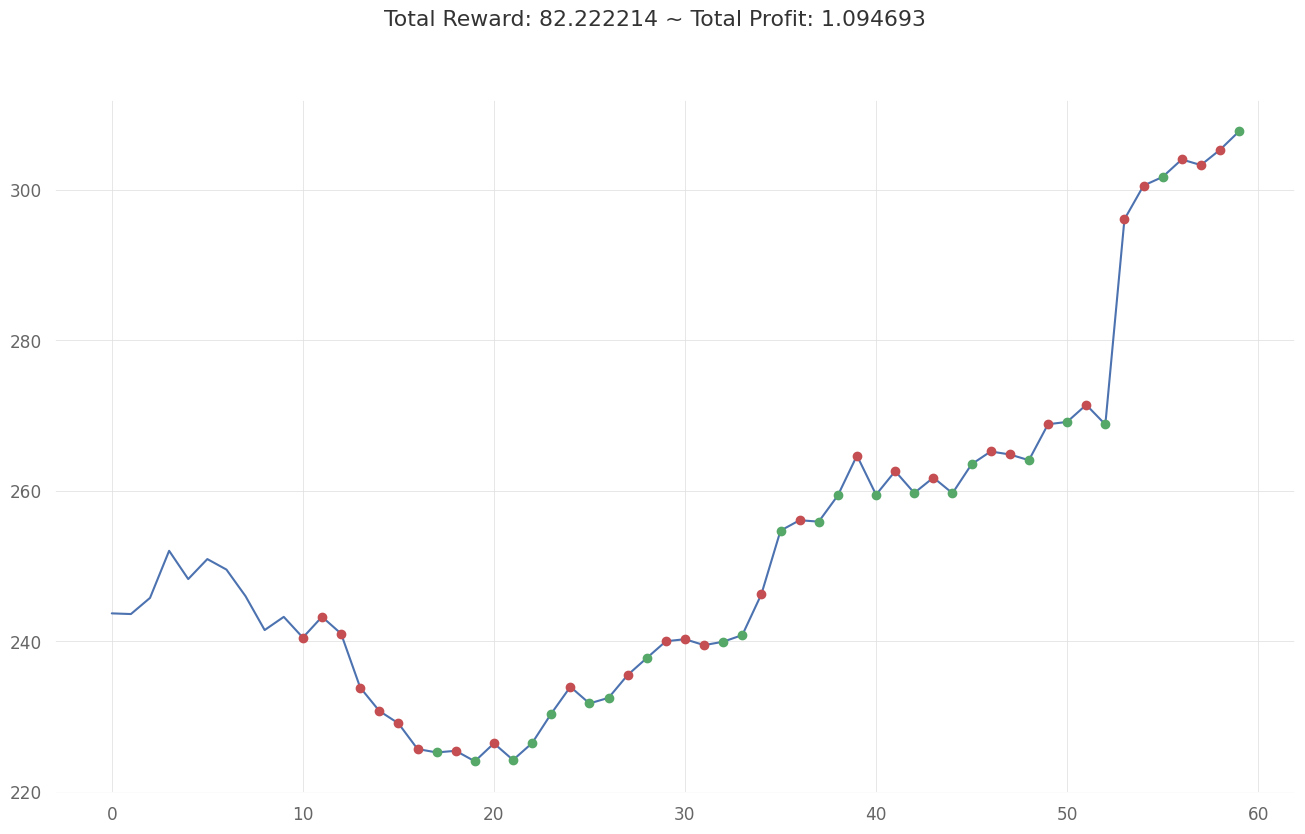

In [379]:
#Plot the results
plt.figure(figsize=(16,9))
env.render_all()
plt.savefig('/home/artem/University_COnference_2024/Autonomous_Trading_System/reinforcment_learning/tmp_A2C/tmp_A2C.png')
plt.show()

In [ ]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=data.index[end_train_index+1:end_val_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)